## Home Health Care Agencies

Public data available at:

https://data.medicare.gov/Home-Health-Compare/Home-Health-Care-Agencies/6jpm-sxkc

https://www.census.gov/newsroom/press-kits/2018/pop-estimates-national-state.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def pop_by_state():
    """
    
    Reads the relevant columns of the CSV file containing the information about
    the estimated population in different states.
    
    """
    data_pop = pd.read_csv('population_2010-2018.csv', usecols = ['NAME', 'POPESTIMATE2018'])
    return data_pop

def data_agencies():
    """
    
    Reads the relevant columns of the CSV file containing the information about
    Home Health Care Agencies.
    
    """
    data_agen = pd.read_csv('Home_Health_Care_Agencies.csv', usecols = ['State', 'Quality of Patient Care Star Rating'])
    return data_agen

def first_plot(data_agen, data_pop):
    """
    
    Combines the two datasets in order to print a plot showing the density of
    Home Health Care Agencies per million inhabitants for each state. Returns
    a tuple with two lists, one of them with all states, and the other one with
    the corresponding density values, which may be used for subsequent analyses.
    
    """
    abbr_to_name = {'TX': 'Texas', 'CA': 'California', 'FL': 'Florida', 'OH': 'Ohio',
         'IL': 'Illinois', 'MI': 'Michigan', 'PA': 'Pennsylvania', 
         'MA': 'Massachusetts', 'OK': 'Oklahoma', 'VA': 'Virginia',
         'IN': 'Indiana', 'CO': 'Colorado', 'LA': 'Louisiana',
         'MN': 'Minnesota', 'NC': 'North Carolina', 'AZ': 'Arizona',
         'IA': 'Iowa', 'MO': 'Missouri', 'NV': 'Nevada', 'TN': 'Tennessee',
         'NY': 'New York', 'AL': 'Alabama', 'WI': 'Wisconsin', 'KS': 'Kansas',
         'GA': 'Georgia', 'AR': 'Arkansas', 'KY': 'Kentucky', 'UT': 'Utah',
         'CT': 'Connecticut', 'SC': 'South Carolina', 'NM': 'New Mexico',
         'NE': 'Nebraska', 'WA': 'Washington', 'WV': 'West Virginia', 
         'OR': 'Oregon', 'MD': 'Maryland', 'ID': 'Idaho', 'MS': 'Mississippi',
         'NJ': 'New Jersey', 'PR': 'Puerto Rico', 'DC': 'District of Columbia',
         'WY': 'Wyoming', 'NH': 'New Hampshire', 'DE': 'Delaware',
         'SD': 'South Dakota', 'MT': 'Montana', 'RI': 'Rhode Island',
         'ME': 'Maine', 'ND': 'North Dakota', 'HI': 'Hawaii', 'AK': 'Alaska',
         'VT': 'Vermont'}
    states = []
    density_agen = []
    data_agen = data_agen['State'].value_counts()[:52]
    for state in data_agen.keys():
        states.append(state)
        density_agen.append(data_agen[state]/data_pop[data_pop['NAME'] == abbr_to_name[state]]['POPESTIMATE2018'].values[0]*(10**6))
    n = len(states)
    for i in range(n):
        for j in range(0, n-i-1):
            if density_agen[j] < density_agen[j+1] : 
                density_agen[j], density_agen[j+1] = density_agen[j+1], density_agen[j]
                states[j], states[j+1] = states[j+1], states[j]
    plt.figure(figsize=(20.0,10.0))
    plt.bar(states, density_agen, width = 0.8)
    plt.xlabel('State')
    plt.ylabel('Density of Home Health Agencies per million inhabitants')
    plt.show
    return states, density_agen

def second_plot(data_agen, states, density_agen):
    """
    
    Combines the two datasets in order to print a scatterplot of the density of
    Home Health Care Agencies per million inhabitants for each state against
    the average rating provided by patients. Returns a list with the average
    ratings, which may be used for subsequent analyses.
    
    """
    ratings = []
    for state in states:
        data_agen = data_agen[pd.notnull(data_agen['Quality of Patient Care Star Rating'])]
        ratings.append(data_agen[data_agen['State'] == state]['Quality of Patient Care Star Rating'].mean())
    plt.figure(figsize=(12.0,9.0))
    plt.scatter(ratings, density_agen, label = states)
    plt.xlabel('Quality of Patient Care Star Rating')
    plt.ylabel('Density of Home Health Agencies per million inhabitants')
    for i, state in enumerate(states):
        if i != 24 and i != 25:
            plt.annotate(state, (ratings[i]+0.015, density_agen[i]+0.02))
    plt.annotate('VA, DE', (ratings[25]+0.015, density_agen[25]+0.02)) 
    plt.show()      
    return ratings

In [3]:
data_pop = pop_by_state()
data_agen = data_agencies()

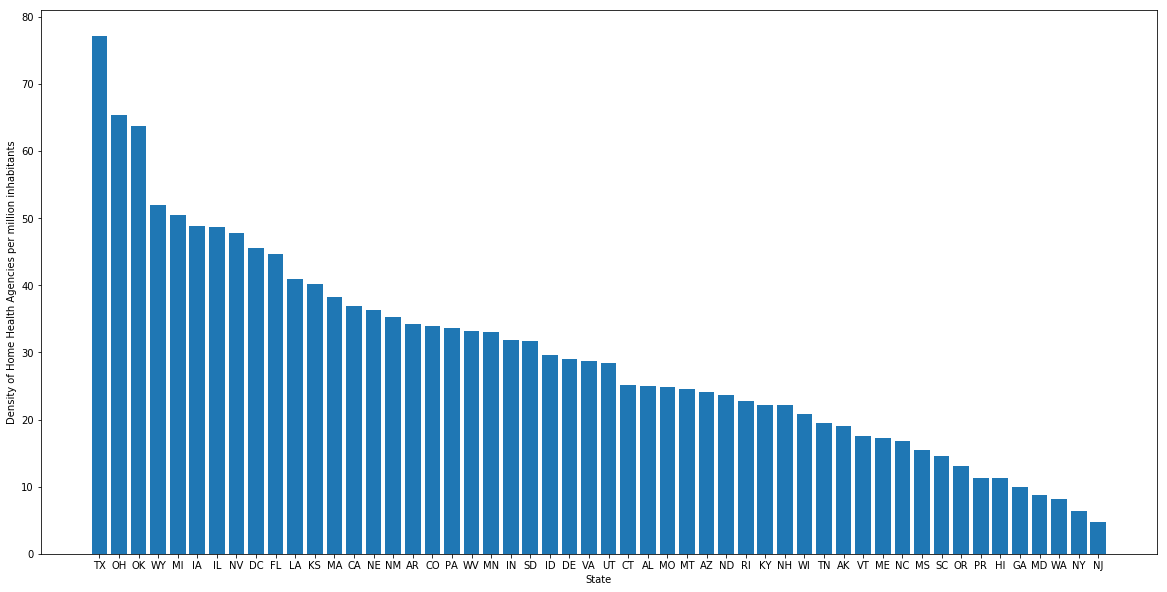

In [4]:
states, density_agen = first_plot(data_agen, data_pop)

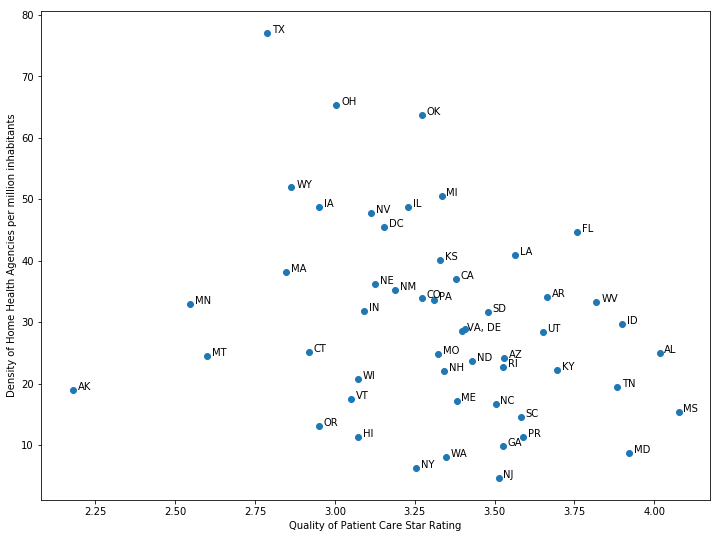

In [5]:
ratings = second_plot(data_agen, states, density_agen)